In [11]:
import torch 
import transformers

import numpy as np
import matplotlib.pyplot as plt

import nltk
nltk.download('punkt_tab')

In [2]:
tokenizer = transformers.AutoTokenizer.from_pretrained("bert-base-cased")

tokenizer_config.json:   0%|          | 0.00/49.0 [00:00<?, ?B/s]

c:\Users\jako\anaconda3\envs\imagimob\lib\site-packages\huggingface_hub\file_download.py:148: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\jako\.cache\huggingface\hub\models--bert-base-cased. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/213k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/436k [00:00<?, ?B/s]

In [3]:
raw_text = [
    "This is a statement",
    "This is another statement but longer",
    "This is"
]

In [5]:
tokenizer(raw_text)

{'input_ids': [[101, 1188, 1110, 170, 4195, 102], [101, 1188, 1110, 1330, 4195, 1133, 2039, 102], [101, 1188, 1110, 102]], 'token_type_ids': [[0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0]], 'attention_mask': [[1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1]]}

In [7]:
tokenizer(raw_text, padding=True)

{'input_ids': [[101, 1188, 1110, 170, 4195, 102, 0, 0], [101, 1188, 1110, 1330, 4195, 1133, 2039, 102], [101, 1188, 1110, 102, 0, 0, 0, 0]], 'token_type_ids': [[0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0]], 'attention_mask': [[1, 1, 1, 1, 1, 1, 0, 0], [1, 1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 0, 0, 0, 0]]}

In [8]:
tokenizer(raw_text, padding=True, return_tensors="pt")

{'input_ids': tensor([[ 101, 1188, 1110,  170, 4195,  102,    0,    0],
        [ 101, 1188, 1110, 1330, 4195, 1133, 2039,  102],
        [ 101, 1188, 1110,  102,    0,    0,    0,    0]]), 'token_type_ids': tensor([[0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 0, 0],
        [1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 0, 0, 0, 0]])}

In [10]:
tokenized_text = tokenizer(raw_text, padding=True, return_tensors="pt")
print(tokenized_text)

{'input_ids': tensor([[ 101, 1188, 1110,  170, 4195,  102,    0,    0],
        [ 101, 1188, 1110, 1330, 4195, 1133, 2039,  102],
        [ 101, 1188, 1110,  102,    0,    0,    0,    0]]), 'token_type_ids': tensor([[0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 0, 0],
        [1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 0, 0, 0, 0]])}


In [18]:
tokenized_text["input_ids"][:, :]

tensor([[ 101, 1188, 1110,  170, 4195,  102,    0,    0],
        [ 101, 1188, 1110, 1330, 4195, 1133, 2039,  102],
        [ 101, 1188, 1110,  102,    0,    0,    0,    0]])

Text(0.5, 0, 'Third sentence tokens')

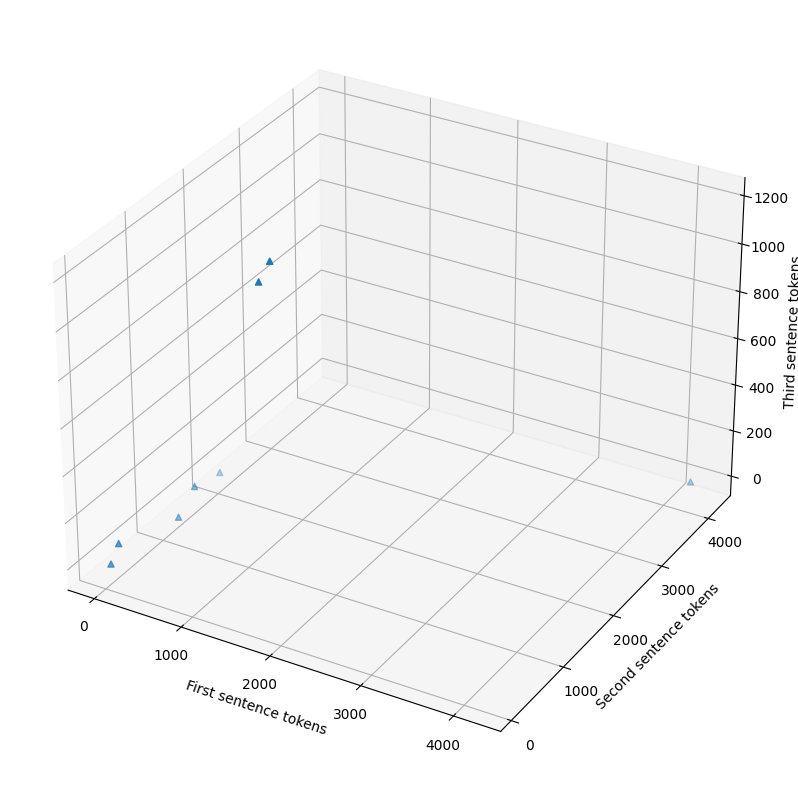

In [38]:
x = tokenized_text["input_ids"][0, :].detach().cpu().numpy()
y = tokenized_text["input_ids"][1, :].detach().cpu().numpy()
z = tokenized_text["input_ids"][2, :].detach().cpu().numpy()

fig = plt.figure(figsize=(15,10))
axes = plt.subplot(1,1,1, projection="3d")
# axes.plot(x, y , z)

axes.scatter(x, y, z, marker="^")
axes.set_xlabel("First sentence tokens")
axes.set_ylabel("Second sentence tokens")
axes.set_zlabel("Third sentence tokens")

In [44]:
# Dictionary of tokennized text
tokenized_text.keys(), tokenized_text.values()

(dict_keys(['input_ids', 'token_type_ids', 'attention_mask']),
 dict_values([tensor([[ 101, 1188, 1110,  170, 4195,  102,    0,    0],
         [ 101, 1188, 1110, 1330, 4195, 1133, 2039,  102],
         [ 101, 1188, 1110,  102,    0,    0,    0,    0]]), tensor([[0, 0, 0, 0, 0, 0, 0, 0],
         [0, 0, 0, 0, 0, 0, 0, 0],
         [0, 0, 0, 0, 0, 0, 0, 0]]), tensor([[1, 1, 1, 1, 1, 1, 0, 0],
         [1, 1, 1, 1, 1, 1, 1, 1],
         [1, 1, 1, 1, 0, 0, 0, 0]])]))

In [45]:
tokenized_text["input_ids"]

tensor([[ 101, 1188, 1110,  170, 4195,  102,    0,    0],
        [ 101, 1188, 1110, 1330, 4195, 1133, 2039,  102],
        [ 101, 1188, 1110,  102,    0,    0,    0,    0]])

In [57]:
idx = 0

while idx < len(tokenized_text["input_ids"]):
    print(f"Sentence number -> {idx+1}, Sentence = {raw_text[idx].split()}, ")
    print(f"\t input_ids \t-> { tokenized_text['input_ids'][idx] }, \n\t attention_mask -> {tokenized_text['attention_mask'][idx]}")
    idx = idx + 1

Sentence number -> 1, Sentence = ['This', 'is', 'a', 'statement'], 
	 input_ids 	-> tensor([ 101, 1188, 1110,  170, 4195,  102,    0,    0]), 
	 attention_mask -> tensor([1, 1, 1, 1, 1, 1, 0, 0])
Sentence number -> 2, Sentence = ['This', 'is', 'another', 'statement', 'but', 'longer'], 
	 input_ids 	-> tensor([ 101, 1188, 1110, 1330, 4195, 1133, 2039,  102]), 
	 attention_mask -> tensor([1, 1, 1, 1, 1, 1, 1, 1])
Sentence number -> 3, Sentence = ['This', 'is'], 
	 input_ids 	-> tensor([ 101, 1188, 1110,  102,    0,    0,    0,    0]), 
	 attention_mask -> tensor([1, 1, 1, 1, 0, 0, 0, 0])


In [70]:
base_model = transformers.AutoModel.from_pretrained("bert-base-cased")
base_model_cls = transformers.AutoModelForSequenceClassification.from_pretrained("bert-base-cased")

model.safetensors:   0%|          | 0.00/436M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-cased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [77]:
torch.nn.functional.softmax(input=base_model_cls(**tokenized_text)["logits"], dim=-1) # Using **kwargs because tokenized_text is a dict

tensor([[0.4798, 0.5202],
        [0.4755, 0.5245],
        [0.4867, 0.5133]], grad_fn=<SoftmaxBackward0>)

In [91]:
base_model(**tokenized_text)["pooler_output"]

tensor([[-0.7647,  0.5200,  1.0000,  ...,  1.0000, -0.5775,  0.9943],
        [-0.7219,  0.4804,  0.9999,  ...,  1.0000, -0.7174,  0.9900],
        [-0.6704,  0.4654,  0.9999,  ...,  1.0000, -0.5226,  0.9888]],
       grad_fn=<TanhBackward0>)

In [88]:
torch.nn.functional.softmax(input=base_model(**tokenized_text)["pooler_output"], dim=-1)

tensor([[0.0005, 0.0017, 0.0027,  ..., 0.0027, 0.0006, 0.0027],
        [0.0005, 0.0016, 0.0027,  ..., 0.0027, 0.0005, 0.0027],
        [0.0005, 0.0016, 0.0027,  ..., 0.0027, 0.0006, 0.0027]],
       grad_fn=<SoftmaxBackward0>)

In [135]:
trump_speech_uniondale = """
And you know what happened? I got eviscerated when I went backstage. 
I went backstage, but I’m not like Biden where he takes… I fight back with my people. 
Remember, we still signed the check. 
They said, “Sir, that’s a terrible thing to have said.” I said, “What is?” “What you said, “What the hell do you have to lose?” 
It’s terrible. It’s demeaning. It’s horrible.” I said, “But it’s true.”
We will renovate the New York Subway so that the greatest city in the world finally has again the greatest transit system anywhere in the world. 
You have the basics. We have to clean it. We have to take care of it. We have to give it a little love. 
And we have to get the criminals the hell out there. We will once again support our incredible police officers, New York’s finest, a lot of them. 
I’ve got the support. To me, this is so important. I think to you, it’s… Every single police group in the nation is supporting me. 
The other day, The Fraternal Order, it’s the largest, they gave us 400,000 police and they gave us a unanimous endorsement, we have it from everybody, have it from everybody. 
We will work with the mayors and the governor to rebuild your defunded and depleted police forces, including New York’s finest and NYPD.
"""

In [138]:
splittext = [text.split() for text in raw_text]

In [139]:
import pandas as pd

In [140]:
all_words = sum(splittext, [])
all_words = pd.Series(all_words)

In [141]:
all_words.value_counts(), [len(word) for word in all_words.unique()]

(This         3
 is           3
 statement    2
 a            1
 another      1
 but          1
 longer       1
 Name: count, dtype: int64,
 [4, 2, 1, 9, 7, 3, 6])

In [151]:
trump_words = trump_speech_uniondale.lower().split()
trump_words = pd.Series(trump_words)

The word 'and' is occurring 17 times but we see that a simple split doesn't account for identical words but which ends with a punctuation

In [171]:
trump_words.value_counts()

the          17
have          9
to            9
we            9
i             7
             ..
terrible.     1
lose?”        1
do            1
is?”          1
nypd.         1
Name: count, Length: 133, dtype: int64

#### Let's try to use NLTK to separate the words for us

In [165]:
word_tokens = nltk.word_tokenize(trump_speech_uniondale.lower())
word_tokens = pd.Series(word_tokens)

In [221]:
word_tokens.value_counts()[:20]

.         17
,         17
the       17
it        11
’         11
we         9
i          9
have       9
to         9
s          8
and        6
you        5
”          5
“          5
police     4
said       4
a          4
what       4
will       3
?          3
Name: count, dtype: int64

#### Using NLTK word tokenizer expands the token registry from 226 with our simple method up to 295 tokens

In [175]:
len(trump_words), len(word_tokens)

(226, 295)

In [202]:
simple_plotting = trump_words.value_counts().reset_index()
nltk_plotting = word_tokens.value_counts().reset_index()

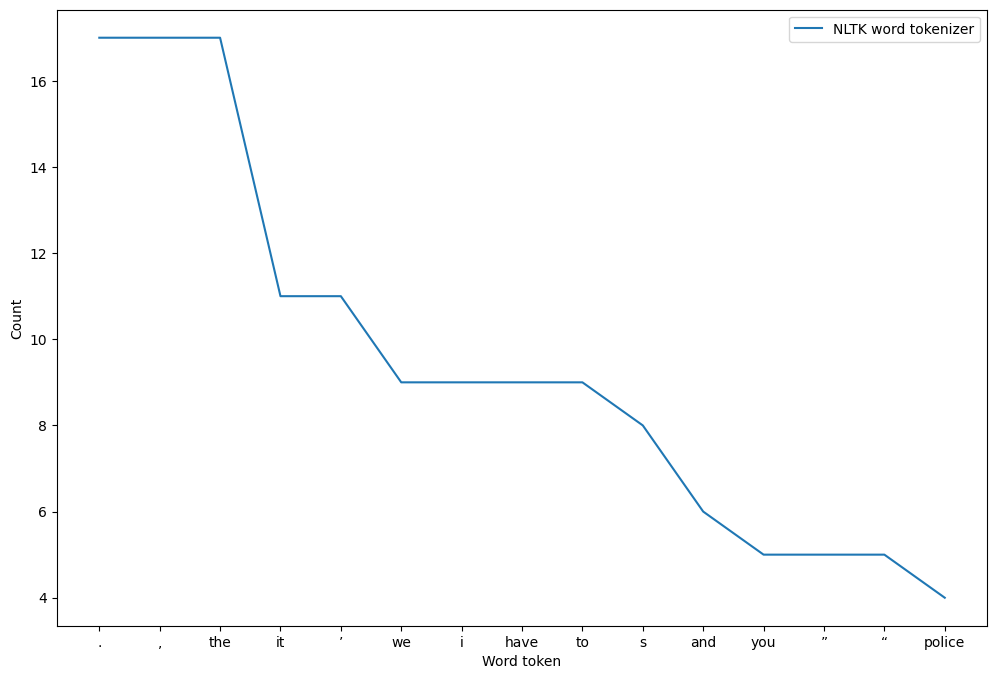

In [219]:
plt.figure(figsize=(12, 8))
plt.plot(nltk_plotting["index"][:15], nltk_plotting["count"][:15], label="NLTK word tokenizer")


plt.xlabel("Word token")
plt.ylabel("Count")
plt.legend()

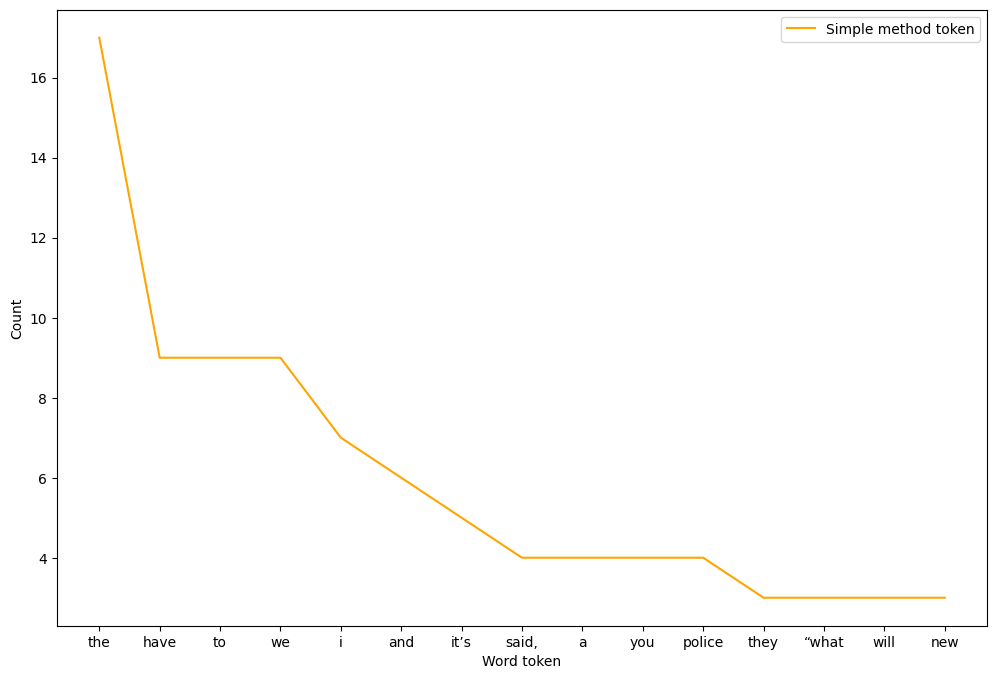

In [218]:
plt.figure(figsize=(12, 8))
plt.plot(simple_plotting["index"][:15], simple_plotting["count"][:15], color="orange", label="Simple method token")

plt.xlabel("Word token")
plt.ylabel("Count")
plt.legend()